In [1]:
from copy import deepcopy
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('AirPassengers.csv')
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


In [2]:
#Check for Planes trips that had more than 130 passengers

In [3]:
df["Jan"] > 150

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
Name: Jan, dtype: bool

In [4]:
df['Dec'] > 150

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
Name: Dec, dtype: bool

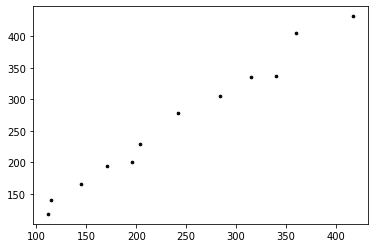

In [5]:
f1 = df['Jan'].values
f2 = df['Dec'].values
d =py.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c="black", s=7)


In [6]:
x = pd.DataFrame(df['Jan'])
y = pd.DataFrame(df['Dec'])

In [7]:
x.size, y.size

(12, 12)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9, 1)
(3, 1)
(9, 1)
(3, 1)


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regressor.intercept_)

[19.31069833]


In [12]:
print(regressor.coef_)

[[1.00761981]]


In [13]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [14]:
y_pred

,Predicted
0,165.415570
1,191.613685
2,216.804180


In [15]:
y_test

,Dec
2,166
3,194
4,201


In [16]:
df.mean()

Jan    241.750000
Feb    235.000000
Mar    270.166667
Apr    267.083333
May    271.833333
Jun    311.666667
Jul    351.333333
Aug    351.083333
Sep    302.416667
Oct    266.583333
Nov    232.833333
Dec    261.833333
dtype: float64

In [17]:
x_test

,Jan
2,145
3,171
4,196


In [18]:
from sklearn import metrics
import numpy as py
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))




Mean Absolute Error: 6.2583083420038195
Mean Squared Error: 85.26938952850503


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

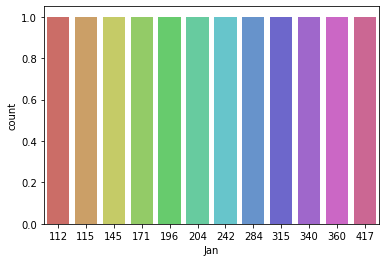

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Jan', data=df, palette='hls')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression()')
plt.
plt.
plt.


In [14]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Jan    12 non-null int64
Feb    12 non-null int64
Mar    12 non-null int64
Apr    12 non-null int64
May    12 non-null int64
Jun    12 non-null int64
Jul    12 non-null int64
Aug    12 non-null int64
Sep    12 non-null int64
Oct    12 non-null int64
Nov    12 non-null int64
Dec    12 non-null int64
dtypes: int64(12)
memory usage: 1.2 KB


In [59]:
df.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,241.75000,235.000000,270.166667,267.083333,271.833333,311.666667,351.333333,351.083333,302.416667,266.583333,232.833333,261.833333
std,101.03296,89.619397,100.559194,107.374839,114.739890,134.219856,156.827255,155.783333,123.954140,110.744964,95.185783,103.093808
min,112.00000,118.000000,132.000000,129.000000,121.000000,135.000000,148.000000,148.000000,136.000000,119.000000,104.000000,118.000000
25%,164.50000,172.500000,189.250000,176.500000,180.250000,208.000000,222.250000,231.250000,202.750000,183.750000,165.500000,187.000000
50%,223.00000,214.500000,251.500000,252.000000,252.000000,289.500000,333.000000,320.000000,285.500000,251.500000,220.000000,253.500000
75%,321.25000,305.250000,357.500000,348.000000,357.000000,425.250000,471.500000,476.500000,404.000000,350.000000,306.250000,336.250000
max,417.00000,391.000000,419.000000,461.000000,472.000000,535.000000,622.000000,606.000000,508.000000,461.000000,390.000000,432.000000


In [41]:
#Look at the first 3 trips for the month Jan, Feb, Mar & Apr

In [58]:
df.iloc[0:3,0:4]

,Jan,Feb,Mar,Apr
0,112,118,132,129
1,115,126,141,135
2,145,150,178,163


In [45]:
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201


In [43]:
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337
10,360,342,406,396,420,472,548,559,463,407,362,405
11,417,391,419,461,472,535,622,606,508,461,390,432


In [57]:
df[["Jan","Feb","Mar","Apr"]].corr()


,Jan,Feb,Mar,Apr
Jan,1.000000,0.998247,0.993215,0.995918
Feb,0.998247,1.000000,0.991813,0.994752
Mar,0.993215,0.991813,1.000000,0.991589
Apr,0.995918,0.994752,0.991589,1.000000


In [56]:
df.drop(columns=["Jan"])


,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,118,132,129,121,135,148,148,136,119,104,118
1,126,141,135,125,149,170,170,158,133,114,140
2,150,178,163,172,178,199,199,184,162,146,166
3,180,193,181,183,218,230,242,209,191,172,194
4,196,236,235,229,243,264,272,237,211,180,201
5,188,235,227,234,264,302,293,259,229,203,229
6,233,267,269,270,315,364,347,312,274,237,278
7,277,317,313,318,374,413,405,355,306,271,306
8,301,356,348,355,422,465,467,404,347,305,336
9,318,362,348,363,435,491,505,404,359,310,337


In [16]:
print(len("Jan"))

3
